In [1]:
# pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/262.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/262.6 kB 991.0 kB/s eta 0:00:01
     ----------------------- -------------- 163.8/262.6 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 262.6/262.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/309.8 kB ? eta -:--:--
     -------------------------------------  307.2/309.8 kB 9.3 MB/s eta 0:00:01
     -------------------------------------- 309.8/309.8 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/370.9 kB ? eta -:--:--
     -------------- ----------------------- 143.4/370.9 kB 8.3 MB/s eta 0:00:01
     -------------- ----------------------- 143.4/370.9 kB 8.3 MB/s eta 0:00:01
     -------------- ----------------------- 143.4/370.9 kB 8.3 MB/s eta 0:00:01
     --------------- -------------------- 163.8/370.9 kB 893.0 

  DEPRECATION: htmlmin is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import pandas_profiling as pp

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.1.1/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.1.1/u/import-error

In [3]:
import pandas as pd

In [4]:
'''This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels. '''

'This problem has the following inputs:\n1. Frequency, in Hertzs.\n2. Angle of attack, in degrees.\n3. Chord length, in meters.\n4. Free-stream velocity, in meters per second.\n5. Suction side displacement thickness, in meters.\n\nThe only output is:\n6. Scaled sound pressure level, in decibels. '

In [6]:
df  = pd.read_csv( "airfoil_self_noise.dat", sep = '\t',header = None)

In [7]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [8]:
df.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [9]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Chord length          1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Suction side          1503 non-null   float64
 5   pressure level        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
#FIRST DO TRAIN_TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state= 0)

In [15]:
#EDA

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gupta\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


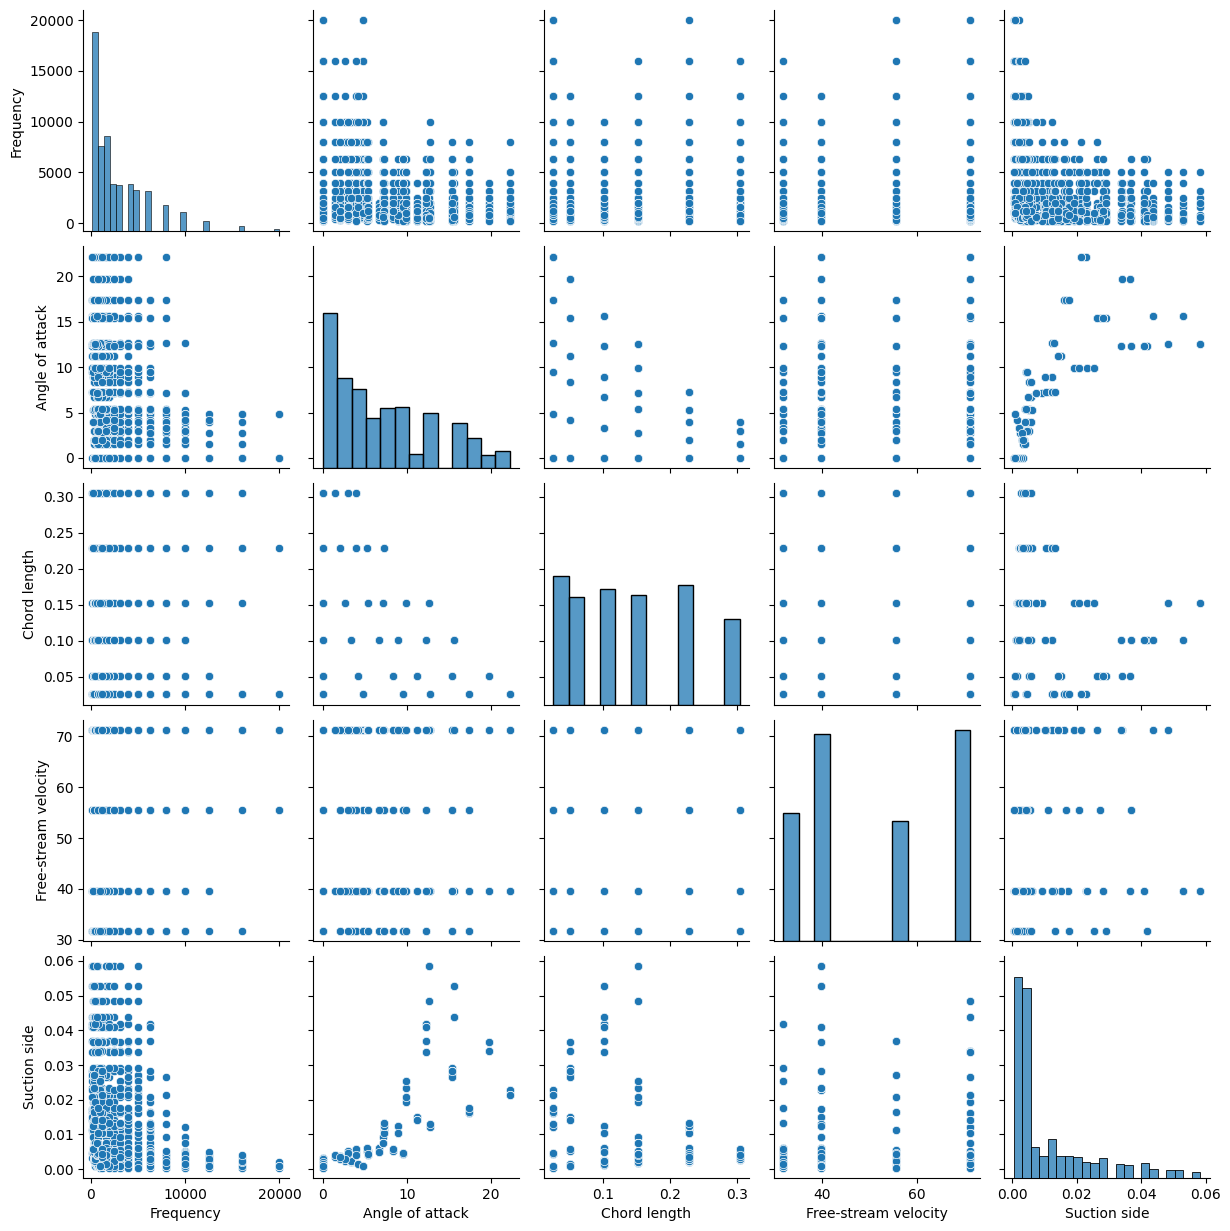

In [17]:
sns.pairplot(X_train)

In [18]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.270737,0.003595,0.138767,-0.241245
Angle of attack,-0.270737,1.000000,-0.509920,0.057222,0.756393
Chord length,0.003595,-0.509920,1.000000,0.018383,-0.231793
Free-stream velocity,0.138767,0.057222,0.018383,1.000000,0.013864
Suction side,-0.241245,0.756393,-0.231793,0.013864,1.000000


In [ ]:
# profile = pp.ProfileReport(X_train)
# profile.to_file("output.html")

In [19]:
# profile

In [20]:
type(X_train), X_train.columns

(pandas.core.frame.DataFrame,
 Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
        'Suction side'],
       dtype='object'))

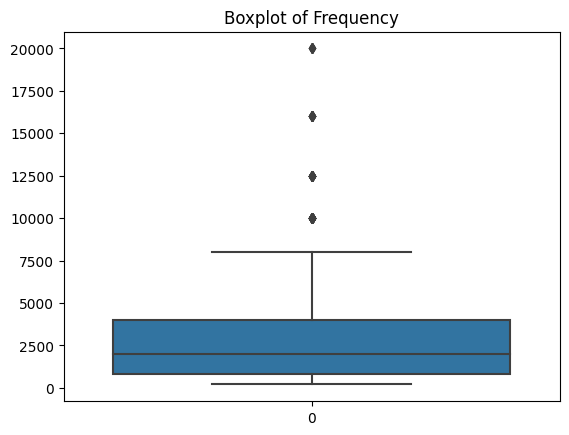

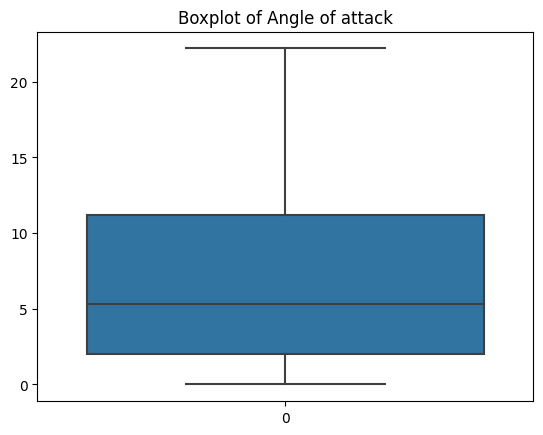

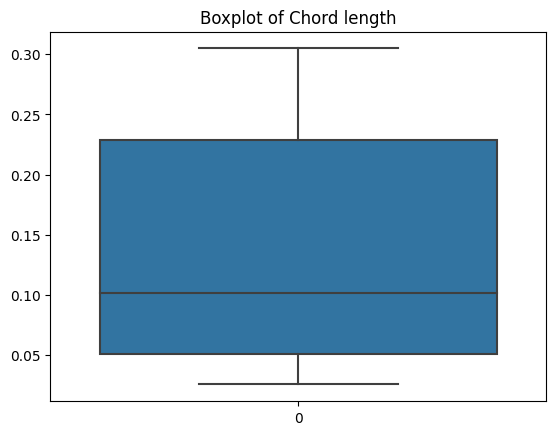

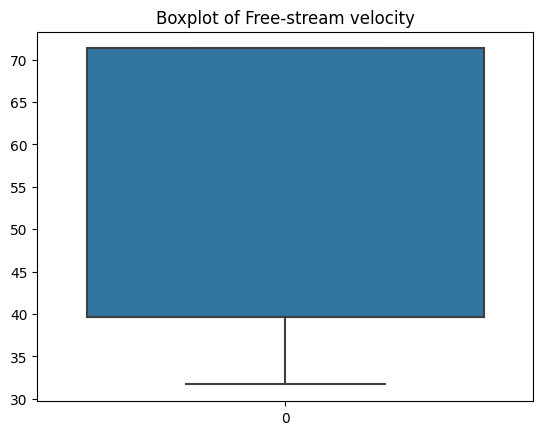

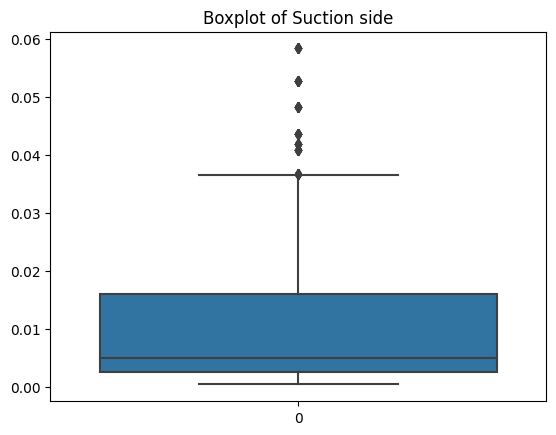

In [21]:
for i in  X_train.columns:
  sns.boxplot(X_train[i])
  plt.title(f"Boxplot of {i}")
  plt.show()







<Axes: xlabel='Frequency', ylabel='pressure level'>

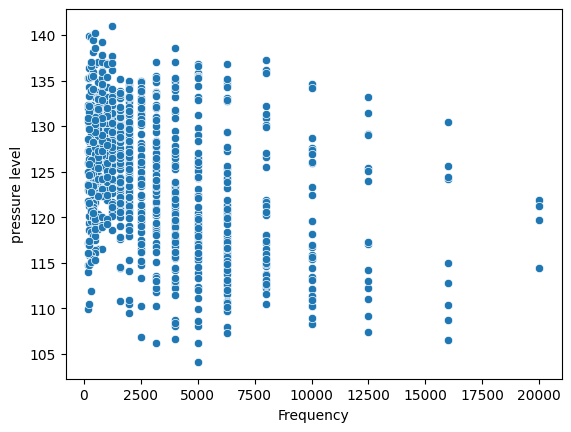

In [22]:
sns.scatterplot(x= X_train['Frequency'], y =y)

<Axes: xlabel='Frequency', ylabel='pressure level'>

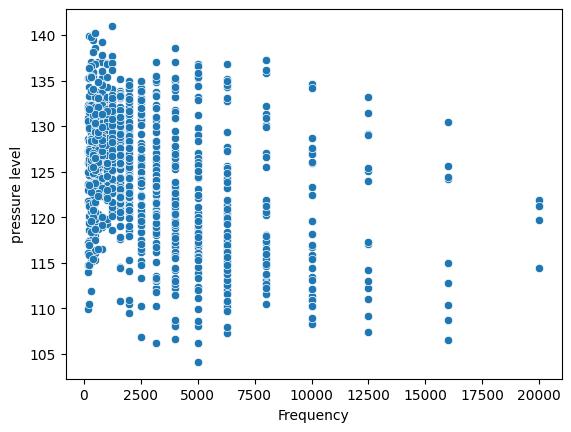

In [23]:
sns.scatterplot(x= X_train['Frequency'], y = y_train)

In [24]:
len(df['pressure level'].unique())
'''so many categories so this beacme a continous output feature.
let if theur are 20 or 50 output feature could it be classification problem or regression problem
then we could consider this as classification
'''

'so many categories so this beacme a continous output feature.\nlet if theur are 20 or 50 output feature could it be classification problem or regression problem\nthen we could consider this as classification\n'

In [25]:
# now some algo require standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)

StandardScaler()

In [27]:
X_train_standard = pd.DataFrame(standard.transform(X_train),columns =["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side"])

In [28]:
X_train_standard

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,-0.775695,0.249123,-0.898413,-0.724177,-0.420335
1,-0.296670,1.409053,-0.898413,1.295488,1.155737
2,0.070583,2.121581,-0.898413,1.295488,1.739529
3,-0.616020,0.713095,-0.898413,-0.724177,0.292042
4,-0.136994,0.945081,0.173771,1.295488,2.817153
...,...,...,...,...,...
1047,3.056510,-1.142792,-0.898413,-0.724177,-0.790013
1048,-0.536182,0.249123,-0.898413,-1.227501,-0.409294
1049,-0.536182,2.535841,-1.166460,1.295488,0.775537
1050,-0.536182,-0.247989,0.173771,0.288841,-0.521240


In [29]:
X_test_standard = pd.DataFrame(standard.transform(X_test),columns =["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side"])

In [30]:
X_test

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
968,10000,0.0,0.0254,71.3,0.000401
9,6300,0.0,0.3048,71.3,0.002663
1468,2500,12.3,0.1016,31.7,0.041876
1150,400,17.4,0.0254,71.3,0.016104
880,2500,15.4,0.0508,71.3,0.026427
...,...,...,...,...,...
546,1250,5.4,0.1524,71.3,0.004012
1331,10000,3.3,0.1016,39.6,0.002451
1334,1000,3.3,0.1016,31.7,0.002514
458,2000,0.0,0.1524,71.3,0.001599


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [32]:
from sklearn.metrics import r2_score
# >>> r2_score(y_true, y_pred)

In [75]:
linear = LinearRegression()
linear.fit(X_train_standard,y_train)
y_pred = linear.predict(X_test_standard)
r2_score(y_test, y_pred)


0.5236569764926962

In [76]:
Rid = Ridge()
Rid.fit(X_train_standard,y_train)
y_pred = Rid.predict(X_test_standard)
r2_score(y_test, y_pred)

0.5236761601515774

In [77]:
Lasso = Lasso()
Lasso.fit(X_train_standard,y_train)
y_pred = Lasso.predict(X_test_standard)
r2_score(y_test, y_pred)

0.37355313191610307

In [78]:
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_standard,y_train)
y_pred = ElasticNet.predict(X_test_standard)
r2_score(y_test, y_pred)

0.34824703967901216

In [79]:
SVR = SVR()
SVR.fit(X_train_standard,y_train)
y_pred = SVR.predict(X_test_standard)
r2_score(y_test, y_pred)

0.7003122766743424

In [80]:
KNeighborsRegressor = KNeighborsRegressor()
KNeighborsRegressor.fit(X_train,y_train)
y_pred = KNeighborsRegressor.predict(X_test)
r2_score(y_test, y_pred)

0.20993934928266988

In [81]:
DecisionTreeRegressor = DecisionTreeRegressor()
DecisionTreeRegressor.fit(X_train,y_train)
y_pred = DecisionTreeRegressor.predict(X_test)
r2_score(y_test, y_pred)

0.8696356386975

In [82]:
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X_train,y_train)
y_pred = RandomForestRegressor.predict(X_test)
r2_score(y_test, y_pred)

0.9353859459188818

In [84]:
import pickle
pickle.dump(RandomForestRegressor, open('model.pkl','wb'))

In [87]:
pickle_model = pickle.load(open('model.pkl','rb'))
#batch output
pickle_model.predict(X_test)

array([132.82686, 118.50254, 111.77551, 118.26824, 125.65791, 122.62149,
       119.28503, 130.34792, 115.77909, 125.73631, 125.26015, 131.57586,
       130.65972, 118.01453, 126.79075, 114.81587, 127.73068, 132.85722,
       117.16112, 116.56313, 121.29502, 130.60748, 129.56089, 128.67572,
       130.73404, 121.59492, 116.92978, 137.53211, 129.61544, 129.92379,
       127.33669, 121.60684, 105.21806, 127.02622, 132.76495, 130.96809,
       117.0745 , 111.39319, 126.35582, 127.42926, 132.36413, 123.95921,
       131.61885, 121.26685, 112.36067, 133.21569, 127.12961, 129.15266,
       128.51904, 129.01404, 123.96792, 125.38123, 121.07212, 127.25086,
       121.07229, 121.34733, 116.49534, 129.93042, 121.43236, 119.77955,
       126.44302, 132.10866, 126.18487, 133.22717, 125.8362 , 125.23883,
       126.80153, 130.94461, 131.15646, 114.45349, 127.75713, 126.70608,
       125.04491, 130.52895, 126.67678, 124.52316, 124.16749, 125.5626 ,
       132.71682, 129.88343, 129.54641, 128.5805 , 

In [86]:
X_test

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
968,10000,0.0,0.0254,71.3,0.000401
9,6300,0.0,0.3048,71.3,0.002663
1468,2500,12.3,0.1016,31.7,0.041876
1150,400,17.4,0.0254,71.3,0.016104
880,2500,15.4,0.0508,71.3,0.026427
...,...,...,...,...,...
546,1250,5.4,0.1524,71.3,0.004012
1331,10000,3.3,0.1016,39.6,0.002451
1334,1000,3.3,0.1016,31.7,0.002514
458,2000,0.0,0.1524,71.3,0.001599


In [91]:
#single input
dict_test = {'Frequency': 9,
             'Angle of attack': 8,
             'Chord length': 10,
             'Free-stream velocity':1,
            'Suction side':7
             }

In [100]:
list(dict_test.values())

[9, 8, 10, 1, 7]

In [98]:
check = list(dict_test.values()) #now can i pass this list as record

In [99]:
pickle_model.predict(check)

C:\Users\gupta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.  8. 10.  1.  7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [103]:
pickle_model.predict([[9, 8, 10, 1, 7]]) #working now

C:\Users\gupta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([117.81694])

In [104]:
pickle_model.predict([[9, 8, 10, 1, 7]])[0]

C:\Users\gupta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


117.81693999999995